In [1]:
! rm -rf thesis_experiments
!git clone https://github.com/nuwanda57/thesis_experiments

Cloning into 'thesis_experiments'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 214 (delta 125), reused 148 (delta 66), pack-reused 0
Receiving objects: 100% (214/214), 364.78 KiB | 8.68 MiB/s, done.
Resolving deltas: 100% (125/125), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd thesis_experiments

/content/thesis_experiments


In [4]:
!python data_generator/formulas_dataset_generator.py --filenames formulas_train_5_10.txt formulas_val_5_10.txt formulas_test_5_10.txt --counts 20000 10000 10000

In [5]:
TRAIN_FILE = 'formulas_train_5_10.txt'
VAL_FILE = 'formulas_val_5_10.txt'
TEST_FILE = 'formulas_test_5_10.txt'
from formulas_vae import experiments
import formulas_vae.model as my_model

import torch

In [6]:
epochs = 3000
model_params = {'token_embedding_dim':128, 'hidden_dim':128,
        'encoder_layers_cnt':1, 'decoder_layers_cnt':1, 'latent_dim':8}

experiments.reconstruct_test_per_epoch(
    TRAIN_FILE, VAL_FILE, TEST_FILE, 'mu', 50, epochs, '/content/drive/My Drive/exp_results_no_train_update', model_params, 25)

/content/thesis_experiments/formulas_vae/model.py:93: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(p)


Epoch 1
	[training] batches count: 79
	[training] loss: 65.377, rec loss: 65.377, kl: 31.927
	[validation] loss: 39.305, rec loss: 39.305, kl: 60.156
Epoch 2
	[training] batches count: 79
	[training] loss: 31.152, rec loss: 31.152, kl: 70.940
	[validation] loss: 26.282, rec loss: 26.282, kl: 76.061
Epoch 3
	[training] batches count: 79
	[training] loss: 24.909, rec loss: 24.909, kl: 73.831
	[validation] loss: 22.973, rec loss: 22.973, kl: 66.123
Epoch 4
	[training] batches count: 79
	[training] loss: 22.581, rec loss: 22.581, kl: 67.810
	[validation] loss: 21.221, rec loss: 21.221, kl: 58.857
Epoch 5
	[training] batches count: 79
	[training] loss: 21.138, rec loss: 21.138, kl: 62.837
	[validation] loss: 20.401, rec loss: 20.401, kl: 64.573
Epoch 6
	[training] batches count: 79
	[training] loss: 20.337, rec loss: 20.337, kl: 57.006
	[validation] loss: 19.471, rec loss: 19.471, kl: 56.741
Epoch 7
	[training] batches count: 79
	[training] loss: 19.426, rec loss: 19.426, kl: 54.483
	[valid

/content/thesis_experiments/formulas_vae/model.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  logits, hidden = self.decode(x, torch.tensor(z, device=self.device), hidden)


Выходные данные были обрезаны до нескольких последних строк (5000).
Epoch 1751
	[training] batches count: 79
	[training] loss: 0.031, rec loss: 0.031, kl: 57.527
	[validation] loss: 0.110, rec loss: 0.110, kl: 57.714
Epoch 1752
	[training] batches count: 79
	[training] loss: 0.030, rec loss: 0.030, kl: 57.548
	[validation] loss: 0.112, rec loss: 0.112, kl: 57.786
Epoch 1753
	[training] batches count: 79
	[training] loss: 0.035, rec loss: 0.035, kl: 57.623
	[validation] loss: 0.112, rec loss: 0.112, kl: 57.865
Epoch 1754
	[training] batches count: 79
	[training] loss: 0.031, rec loss: 0.031, kl: 57.709
	[validation] loss: 0.112, rec loss: 0.112, kl: 57.867
Epoch 1755
	[training] batches count: 79
	[training] loss: 0.027, rec loss: 0.027, kl: 57.713
	[validation] loss: 0.103, rec loss: 0.103, kl: 57.923
Epoch 1756
	[training] batches count: 79
	[training] loss: 0.030, rec loss: 0.030, kl: 57.751
	[validation] loss: 0.136, rec loss: 0.136, kl: 58.038
Epoch 1757
	[training] batches count: 

In [8]:
import results.analyse_results as my_analyse_results

In [10]:
stats = []
epochs = list(range(50, 3001, 50))
rec_file_template = '/content/drive/My Drive/exp_results_no_train_update/rec_%d'
for t in epochs:
    _, _, percent_correct = my_analyse_results.main(rec_file_template % t, TEST_FILE)
    stats.append(percent_correct)

Correct formulas: 1506
Incorrect formulas: 8494
Percent of correct formulas: 15.060
Correct formulas: 4523
Incorrect formulas: 5477
Percent of correct formulas: 45.230
Correct formulas: 6414
Incorrect formulas: 3586
Percent of correct formulas: 64.140
Correct formulas: 7256
Incorrect formulas: 2744
Percent of correct formulas: 72.560
Correct formulas: 4962
Incorrect formulas: 5038
Percent of correct formulas: 49.620
Correct formulas: 7487
Incorrect formulas: 2513
Percent of correct formulas: 74.870
Correct formulas: 8313
Incorrect formulas: 1687
Percent of correct formulas: 83.130
Correct formulas: 7094
Incorrect formulas: 2906
Percent of correct formulas: 70.940
Correct formulas: 8526
Incorrect formulas: 1474
Percent of correct formulas: 85.260
Correct formulas: 8056
Incorrect formulas: 1944
Percent of correct formulas: 80.560
Correct formulas: 8926
Incorrect formulas: 1074
Percent of correct formulas: 89.260
Correct formulas: 8051
Incorrect formulas: 1949
Percent of correct formulas:

In [11]:
 import matplotlib.pyplot as plt

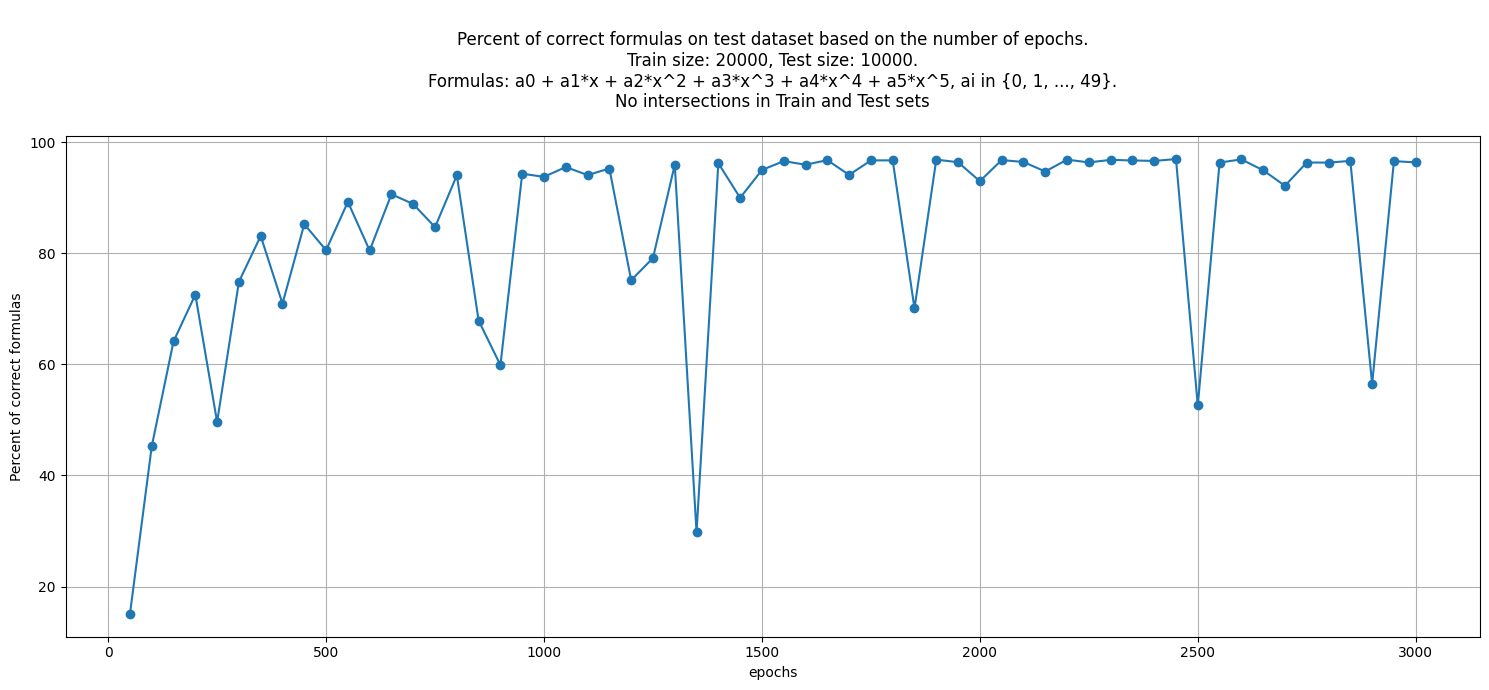

In [19]:
f = plt.figure(figsize=(15, 7), dpi=100)
plt.plot(epochs, stats, marker='o')
plt.title("""
Percent of correct formulas on test dataset based on the number of epochs.
Train size: 20000, Test size: 10000.
Formulas: a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 + a5*x^5, ai in {0, 1, ..., 49}.
No intersections in Train and Test sets
""")
plt.xlabel('epochs')
plt.ylabel('Percent of correct formulas')
# plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('no_train_update.png', dpi=f.dpi)
plt.show()